In [6]:
% cd /content/drive/MyDrive/Colab_notebooks/

/content/drive/MyDrive/Colab_notebooks


##Application of z-score in Machine learning
To standardize the data as a part of data pre-processing.
To compare the z-score values of different standard distributions for better results.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
df_y = pd.read_csv('cleaned_df.csv')

In [9]:
Y = df_y['pIC50']

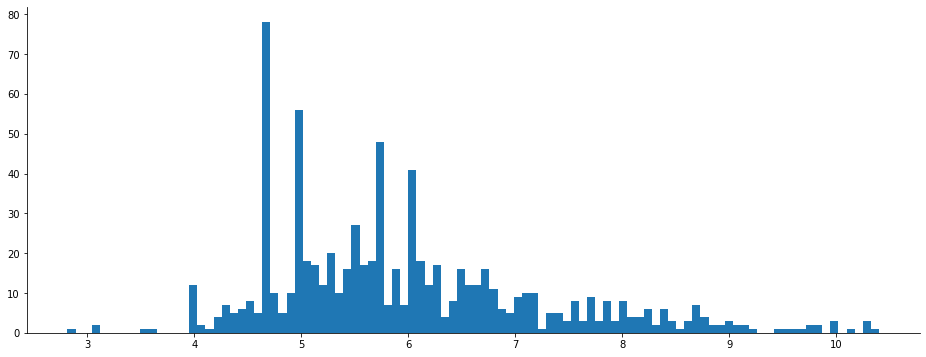

In [10]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 6)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

plt.hist(df_y['pIC50'], bins=100);

In [11]:
from scipy import stats
df_y['pIC50_z'] = np.abs(stats.zscore(df_y['pIC50']))

In [12]:
df_y = df_y[df_y['pIC50_z'] <= 3]

In [13]:
df_y = df_y.drop('pIC50_z', axis=1)

(array([ 1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,
         0.,  0.,  0., 12.,  1.,  1.,  2.,  5.,  6.,  9.,  2.,  8.,  4.,
        78., 10.,  5., 10.,  3., 62., 18., 14., 14., 15., 15., 13., 23.,
        24., 37., 21.,  7., 13.,  9., 37., 17., 10., 15., 12.,  6.,  8.,
        14., 11., 11., 16., 11.,  1., 10.,  9.,  9.,  3.,  9.,  3.,  2.,
         5.,  5.,  6.,  3.,  9.,  3.,  8.,  3.,  8.,  0.,  6.,  7.,  2.,
         3.,  4.,  3.,  2.,  2.,  7.,  3.,  3.,  2.,  3.,  1.,  3.,  1.,
         0.,  0.,  0.,  1.,  1.,  1.,  1.,  2.,  2.]),
 array([2.81247928, 2.88289321, 2.95330713, 3.02372106, 3.09413499,
        3.16454891, 3.23496284, 3.30537677, 3.37579069, 3.44620462,
        3.51661855, 3.58703247, 3.6574464 , 3.72786033, 3.79827425,
        3.86868818, 3.93910211, 4.00951604, 4.07992996, 4.15034389,
        4.22075782, 4.29117174, 4.36158567, 4.4319996 , 4.50241352,
        4.57282745, 4.64324138, 4.7136553 , 4.78406923, 4.85448316,
        4.92489708, 4.9953

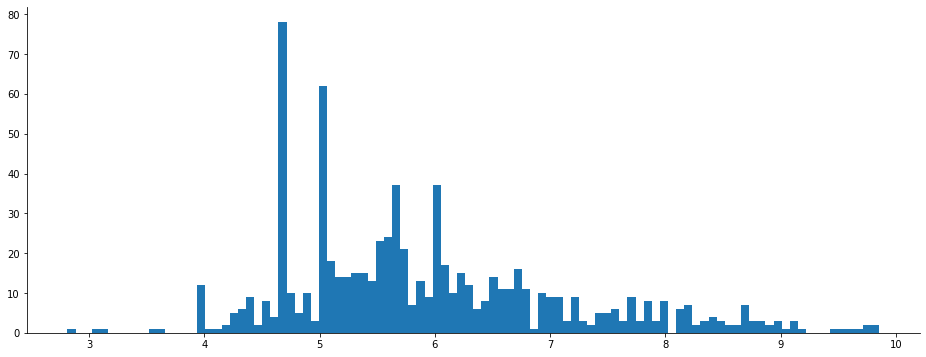

In [14]:
plt.hist(df_y['pIC50'], bins=100)

In [15]:
df_y = df_y.reset_index()
df_y = df_y.drop('index', axis=1)

In [16]:
df_y1 = df_y[['Name']]
df_y1

,Name
0,CHEMBL368457
1,CHEMBL305558
2,CHEMBL4095361
3,CHEMBL4087670
4,CHEMBL1684581
...,...
765,CHEMBL4465173
766,CHEMBL388177
767,CHEMBL4475573
768,CHEMBL4542960


In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
from numpy import sqrt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import BayesianRidge
from sklearn import metrics

##Fingerprint

R² score tells us how well our model is fitted to the data by comparing it to the average line of the dependent variable. If the score is closer to 1, then it indicates that our model performs well versus if the score is farther from 1, then it indicates that our model does not perform so well. R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that’s explained by an independent variable or variables in a regression model. Whereas correlation explains the strength of the relationship between an independent and dependent variable, R-squared explains to what extent the variance of one variable explains the variance of the second variable. So, if the R2 of a model is 0.50, then approximately half of the observed variation can be explained by the model’s inputs.

In [18]:
df = pd.read_csv('Fingerprints.csv')

In [19]:
df = pd.merge(df, df_y1, on=["Name"])

In [20]:
X = df.drop('Name', axis=1)
Y = df_y.pIC50
Y

0      7.421361
1      4.397940
2      4.698970
3      4.698970
4      5.667562
         ...   
765    9.000000
766    7.829738
767    7.065502
768    7.657577
769    7.078834
Name: pIC50, Length: 770, dtype: float64

In [21]:
#from sklearn.utils import shuffle
#import numpy as np
#X, Y = shuffle(X, Y)

In [22]:
    
# Splitting dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
   
# Creating and training model
np.random.seed(100)
model = RandomForestRegressor(n_estimators=100,max_depth=6, min_samples_leaf=6,
                               min_samples_split=2, random_state= 42)
model.fit(X_train, Y_train)
   
# Model making a prediction on test data
prediction = model.predict(X_test)
   
# Evaluation of r2 score of the model against the test set
print(f"r2 Score Of Test Set : {r2_score(Y_test, prediction)}")


r2 Score Of Test Set : 0.6701312023712317


In [23]:
# df = new data from smiles
# make a prediction
#pIC50 = model.predict([df])
# summarize prediction
#print('Predicted: %.3f' % pIC50)

In [24]:
Y_pred = model.predict(X_test)

In statistical modeling and particularly regression analyses, a common way of measuring the quality of the fit of the model is the RMSE (also called Root Mean Square Deviation), given by where yi is the ith observation of y and ŷ the predicted y value given the model. If the predicted responses are very close to the true responses the RMSE will be small. If the predicted and true responses differ substantially — at least for some observations — the RMSE will be large. A value of zero would indicate a perfect fit to the data. Since the RMSE is measured on the same scale, with the same units as y, one can expect 68% of the y values to be within 1 RMSE — given the data is normally distributed. 

The mean absolute error (MAE) is a quantity used to measure how close predictions are to the outcomes. The mean absolute error is an average of the all absolute errors. The MSE is a measure of the quality of an estimator, it is always positive, and values which are closer to zero are better. https://gzipwtf.com/what-is-mean-absolute-error-in-python/

In [25]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, prediction)
rmse = sqrt(mse)
mse

0.5127506209254287

Differences among these evaluation metrics Mean Squared Error(MSE) and Root Mean Square Error penalizes the large prediction errors vi-a-vis Mean Absolute Error (MAE). MAE is more robust to data with outliers. The lower value of MAE, MSE, and RMSE implies higher accuracy of a regression model.In statistics, mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon. Examples of Y versus X include comparisons of predicted versus observed, subsequent time versus initial time, and one technique of measurement versus an alternative technique of measurement. https://machinelearningmastery.com/regression-metrics-for-machine-learning/

In [26]:
# example of calculate the mean absolute error
from sklearn.metrics import mean_absolute_error
# calculate errors
errors = mean_absolute_error(Y_test, prediction)
print(errors)

0.4757267628623454


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

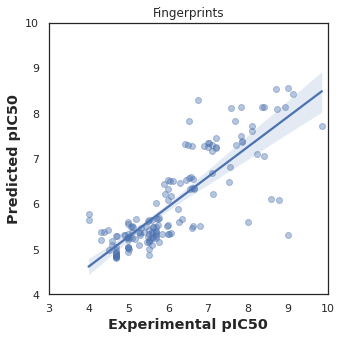

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set(title='Fingerprints')
ax.set_xlim(3, 10)
ax.set_ylim(4, 10)
ax.figure.set_size_inches(5, 5)
plt.show

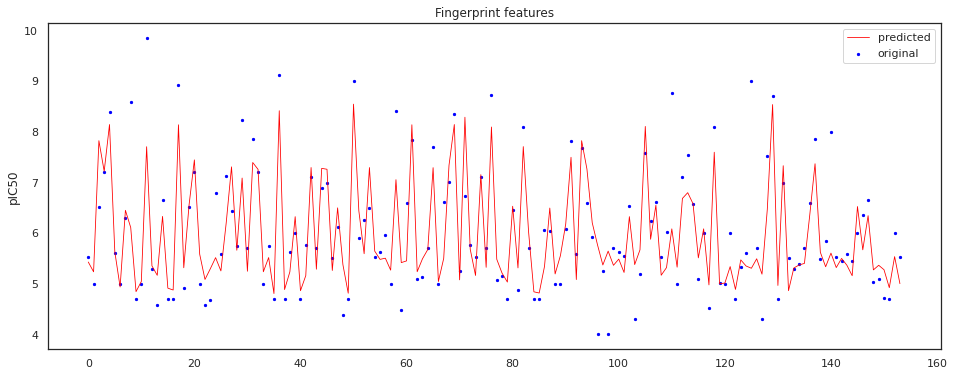

In [28]:
x_ax = range(len(Y_test))
plt.scatter(x_ax, Y_test, s=5, color="blue", label="original")
plt.plot(x_ax, prediction, lw=0.8, color="red", label="predicted")
plt.title("Fingerprint features")
plt.ylabel("pIC50")
plt.legend()
plt.show() 

 Might be possible that there is a problem with pIC50 score. However the test score might contain values that are lower than in the training. Uneven distribution of activity. Toght binding limit. Membrane bound receptor. Biological measures become challenging due to an assumption that the concentration of molecules are higher than the enzyme.

##2D

In [29]:
df1 = pd.read_csv('2D.csv')

In [30]:
df1 = pd.merge(df1, df_y1, on=["Name"])

In [31]:
df1 = df1.dropna(axis='columns')

In [32]:
X1 = df1.drop('Name', axis=1)
Y1 = df_y.pIC50
X1

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,0,-0.1340,0.017956,46.4096,55.007032,12,13,48,24,24,...,6.753829,48.801005,2.033375,11.561476,5.563435,5.998041,1470.0,35.0,5.925,126.0
1,0,-1.0959,1.200997,38.0508,81.506411,29,31,67,40,27,...,8.331118,82.101708,2.052543,32.393034,7.542754,18.831507,7240.0,60.0,5.045,210.0
2,0,-2.2119,4.892502,68.1652,89.330548,23,24,77,41,36,...,7.172531,85.040789,2.074166,27.431635,8.199105,19.232530,7532.0,62.0,6.362,220.0
3,0,-1.4805,2.191880,73.8025,81.268962,17,17,72,38,34,...,7.281543,78.114446,2.055643,29.567184,5.169271,19.601240,6154.0,55.0,5.046,200.0
4,0,-0.7933,0.629325,52.1166,93.020790,29,31,75,45,30,...,8.655574,92.424840,2.053885,30.655471,7.573769,9.326881,9800.0,71.0,9.818,246.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,0,1.0914,1.191154,23.9556,49.341895,18,19,38,23,15,...,9.028008,47.086177,2.047225,14.224156,0.000000,9.195518,1468.0,32.0,4.623,116.0
766,0,-1.7768,3.157018,33.2659,55.802239,16,17,48,25,23,...,7.024329,50.787007,2.031480,10.576481,7.584767,2.991715,1688.0,37.0,5.525,128.0
767,1,-3.0865,9.526482,122.2218,88.990099,6,6,82,39,43,...,7.234684,76.514322,1.961906,38.647673,23.641209,8.807932,8008.0,44.0,0.216,174.0
768,0,-0.7588,0.575777,127.5922,93.766857,6,6,88,39,49,...,6.492376,76.514322,1.961906,31.261151,19.453760,8.807932,8008.0,44.0,3.327,174.0


In [33]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X1 = selection.fit_transform(X1) #Remove low variance features

In [34]:
    
# Splitting dataset into training and testing sets
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.2, random_state = 42)
   
# Creating and training model
np.random.seed(100)
model1 = RandomForestRegressor(n_estimators=100)
model1.fit(X1_train, Y1_train)
   
# Model making a prediction on test data
prediction1 = model1.predict(X1_test)
   
# Evaluation of r2 score of the model against the test set
print(f"r2 Score Of Test Set : {r2_score(Y1_test, prediction1)}")

r2 Score Of Test Set : 0.6438531557140716


Overtraining of the model when there is a big change in the r2 score between the test and training set. Overfitting of data - diagnosis of the problem. 

In [35]:
from sklearn.metrics import r2_score
r2_score(Y1_test, prediction1)

0.6438531557140716

In [36]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, prediction1)
#rmse = sqrt(mse)
mse

0.5535974207349997

In [37]:
# example of calculate the mean absolute error
from sklearn.metrics import mean_absolute_error
# calculate errors
errors = mean_absolute_error(Y_test, prediction1)
print(errors)

0.5081610706922891


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

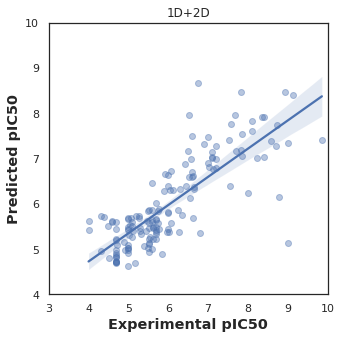

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, prediction1, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set(title='1D+2D')
ax.set_xlim(3, 10)
ax.set_ylim(4, 10)
ax.figure.set_size_inches(5, 5)
plt.show

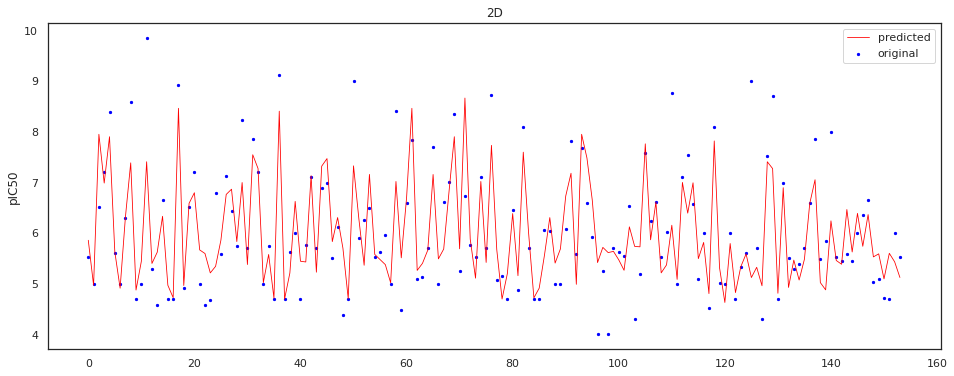

In [39]:
x_ax = range(len(Y_test))
plt.scatter(x_ax, Y_test, s=5, color="blue", label="original")
plt.plot(x_ax, prediction1, lw=0.8, color="red", label="predicted")
plt.title("2D")
plt.ylabel("pIC50")
plt.legend()
plt.show() 

##3D

In [40]:
df2 = pd.read_csv('3D.csv')

In [41]:
df2 = pd.merge(df2, df_y1, on=["Name"])

In [42]:
df2

,Name,TDB1u,TDB2u,TDB3u,TDB4u,TDB5u,TDB6u,TDB7u,TDB8u,TDB9u,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,CHEMBL368457,1.263087,2.213772,3.067684,3.795635,4.835887,5.862947,6.562342,7.745256,8.650767,...,0.840189,0.135543,0.633989,0.335856,0.234206,26.442340,96.181953,173.720274,0.760284,1.204051
1,CHEMBL305558,1.281502,2.271699,3.105024,3.948396,4.837981,5.801962,6.639571,7.545545,8.532861,...,0.863471,0.107429,0.531981,0.436635,0.433203,52.473404,333.208877,775.688308,0.795207,1.401819
2,CHEMBL4095361,1.272791,2.228076,3.047907,3.861145,4.750282,5.546655,6.397271,7.171556,7.710522,...,0.697043,0.199940,0.664555,0.401713,0.446637,33.048866,253.146736,804.441768,0.545565,1.512906
3,CHEMBL4087670,1.275247,2.225649,3.031699,3.834690,4.709406,5.525507,6.389674,7.204710,7.814361,...,0.885563,0.092530,0.582566,0.354198,0.419757,43.745290,197.810300,391.828006,0.828345,1.356521
4,CHEMBL1684581,1.305534,2.302159,3.126679,3.957892,4.892466,5.744646,6.568685,7.324457,8.058796,...,0.812606,0.106545,0.575021,0.523626,0.401330,49.307849,391.169069,1279.615826,0.718910,1.499977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,CHEMBL4465173,1.293954,2.274893,3.115294,3.981363,5.002704,5.902476,6.987887,7.867927,8.795647,...,0.854325,0.076205,0.568053,0.421117,0.408899,23.762793,73.264902,157.715173,0.781487,1.398069
766,CHEMBL388177,1.255809,2.230321,3.036714,3.816633,4.721168,5.527827,6.134158,6.766008,7.258394,...,0.661971,0.215487,0.518928,0.398162,0.375722,17.409774,75.827005,185.477639,0.492957,1.292812
767,CHEMBL4475573,1.263234,2.194343,2.956736,3.746233,4.845544,5.782048,6.740555,7.695721,8.565649,...,0.773830,0.200030,0.680893,0.542107,0.381504,63.854530,734.933217,1852.223463,0.660746,1.604505
768,CHEMBL4542960,1.249471,2.165005,2.946639,3.682748,4.766693,5.730793,6.645514,7.649009,8.577870,...,0.782789,0.190521,0.667738,0.530499,0.365604,67.766071,804.173380,2110.665999,0.674183,1.563841


In [43]:
X2 = df2.drop('Name', axis=1)
Y2 = df_y.pIC50
X2

,TDB1u,TDB2u,TDB3u,TDB4u,TDB5u,TDB6u,TDB7u,TDB8u,TDB9u,TDB10u,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,1.263087,2.213772,3.067684,3.795635,4.835887,5.862947,6.562342,7.745256,8.650767,9.775657,...,0.840189,0.135543,0.633989,0.335856,0.234206,26.442340,96.181953,173.720274,0.760284,1.204051
1,1.281502,2.271699,3.105024,3.948396,4.837981,5.801962,6.639571,7.545545,8.532861,9.297230,...,0.863471,0.107429,0.531981,0.436635,0.433203,52.473404,333.208877,775.688308,0.795207,1.401819
2,1.272791,2.228076,3.047907,3.861145,4.750282,5.546655,6.397271,7.171556,7.710522,8.211494,...,0.697043,0.199940,0.664555,0.401713,0.446637,33.048866,253.146736,804.441768,0.545565,1.512906
3,1.275247,2.225649,3.031699,3.834690,4.709406,5.525507,6.389674,7.204710,7.814361,8.515878,...,0.885563,0.092530,0.582566,0.354198,0.419757,43.745290,197.810300,391.828006,0.828345,1.356521
4,1.305534,2.302159,3.126679,3.957892,4.892466,5.744646,6.568685,7.324457,8.058796,8.645912,...,0.812606,0.106545,0.575021,0.523626,0.401330,49.307849,391.169069,1279.615826,0.718910,1.499977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,1.293954,2.274893,3.115294,3.981363,5.002704,5.902476,6.987887,7.867927,8.795647,9.880930,...,0.854325,0.076205,0.568053,0.421117,0.408899,23.762793,73.264902,157.715173,0.781487,1.398069
766,1.255809,2.230321,3.036714,3.816633,4.721168,5.527827,6.134158,6.766008,7.258394,7.721846,...,0.661971,0.215487,0.518928,0.398162,0.375722,17.409774,75.827005,185.477639,0.492957,1.292812
767,1.263234,2.194343,2.956736,3.746233,4.845544,5.782048,6.740555,7.695721,8.565649,9.493728,...,0.773830,0.200030,0.680893,0.542107,0.381504,63.854530,734.933217,1852.223463,0.660746,1.604505
768,1.249471,2.165005,2.946639,3.682748,4.766693,5.730793,6.645514,7.649009,8.577870,9.399860,...,0.782789,0.190521,0.667738,0.530499,0.365604,67.766071,804.173380,2110.665999,0.674183,1.563841


In [44]:
from sklearn.utils import shuffle
import numpy as np
X2, Y2 = shuffle(X2, Y2)

In [45]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X2 = selection.fit_transform(X2) #Remove low variance features

In [46]:
    
# Splitting dataset into training and testing sets
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.2, random_state = 42)
   
# Creating and training model
model2 = RandomForestRegressor(n_estimators=100, random_state= 0)
model2.fit(X2_train, Y2_train)
   
# Model making a prediction on test data
prediction2 = model2.predict(X2_test)
   


In [48]:
# example of calculate the mean absolute error
from sklearn.metrics import mean_absolute_error
# calculate errors
errors = mean_absolute_error(Y2_test, prediction2)
print(errors)

0.5461787971927868


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

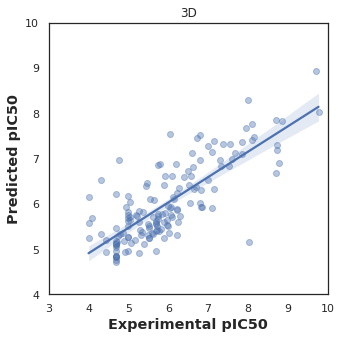

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y2_test, prediction2, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set(title='3D')
ax.set_xlim(3, 10)
ax.set_ylim(4, 10)
ax.figure.set_size_inches(5, 5)
plt.show

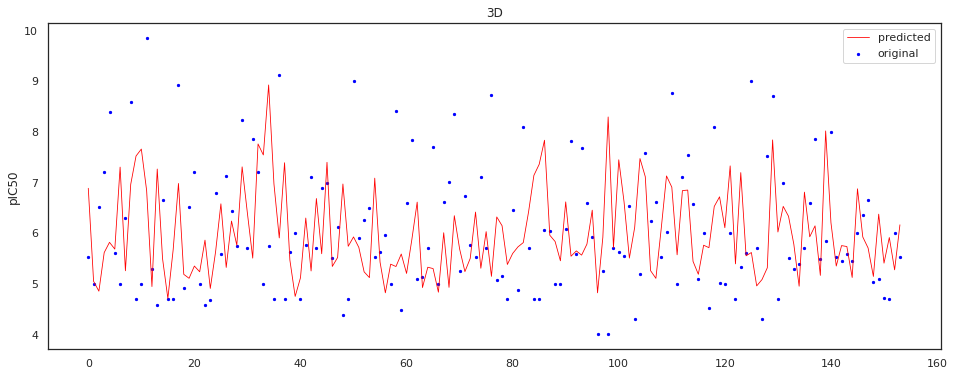

In [50]:
x_ax = range(len(Y_test))
plt.scatter(x_ax, Y_test, s=5, color="blue", label="original")
plt.plot(x_ax, prediction2, lw=0.8, color="red", label="predicted")
plt.title("3D")
plt.ylabel("pIC50")
plt.legend()
plt.show() 

##2D+3D

In [51]:
df3= pd.merge(df1, df2, how="left", on=["Name"])

In [52]:
df3 = pd.merge(df3, df_y1, on=["Name"])

In [53]:
df3.to_csv('2D+3D.csv', index=False)

In [54]:
Y3 = df_y.pIC50

In [55]:
Y3

0      7.421361
1      4.397940
2      4.698970
3      4.698970
4      5.667562
         ...   
765    9.000000
766    7.829738
767    7.065502
768    7.657577
769    7.078834
Name: pIC50, Length: 770, dtype: float64

In [56]:
df3 = df3.dropna(axis='columns')

In [57]:
X3= df3.drop('Name', axis=1)
X3

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,0,-0.1340,0.017956,46.4096,55.007032,12,13,48,24,24,...,0.840189,0.135543,0.633989,0.335856,0.234206,26.442340,96.181953,173.720274,0.760284,1.204051
1,0,-1.0959,1.200997,38.0508,81.506411,29,31,67,40,27,...,0.863471,0.107429,0.531981,0.436635,0.433203,52.473404,333.208877,775.688308,0.795207,1.401819
2,0,-2.2119,4.892502,68.1652,89.330548,23,24,77,41,36,...,0.697043,0.199940,0.664555,0.401713,0.446637,33.048866,253.146736,804.441768,0.545565,1.512906
3,0,-1.4805,2.191880,73.8025,81.268962,17,17,72,38,34,...,0.885563,0.092530,0.582566,0.354198,0.419757,43.745290,197.810300,391.828006,0.828345,1.356521
4,0,-0.7933,0.629325,52.1166,93.020790,29,31,75,45,30,...,0.812606,0.106545,0.575021,0.523626,0.401330,49.307849,391.169069,1279.615826,0.718910,1.499977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,0,1.0914,1.191154,23.9556,49.341895,18,19,38,23,15,...,0.854325,0.076205,0.568053,0.421117,0.408899,23.762793,73.264902,157.715173,0.781487,1.398069
766,0,-1.7768,3.157018,33.2659,55.802239,16,17,48,25,23,...,0.661971,0.215487,0.518928,0.398162,0.375722,17.409774,75.827005,185.477639,0.492957,1.292812
767,1,-3.0865,9.526482,122.2218,88.990099,6,6,82,39,43,...,0.773830,0.200030,0.680893,0.542107,0.381504,63.854530,734.933217,1852.223463,0.660746,1.604505
768,0,-0.7588,0.575777,127.5922,93.766857,6,6,88,39,49,...,0.782789,0.190521,0.667738,0.530499,0.365604,67.766071,804.173380,2110.665999,0.674183,1.563841


In [58]:
X3.shape

(770, 1812)

In [59]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X3 = selection.fit_transform(X3)

In [60]:
    
# Splitting dataset into training and testing sets
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size = 0.2, random_state = 42)
   
# Creating and training model
model3 = RandomForestRegressor(n_estimators=100, random_state= 0)
model3.fit(X3_train, Y3_train)
   
# Model making a prediction on test data
prediction3 = model3.predict(X3_test)
   
# Evaluation of r2 score of the model against the test set
print(f"r2 Score Of Test Set : {r2_score(Y3_test, prediction3)}")

r2 Score Of Test Set : 0.6469818418547824


In [61]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y3_test, prediction3)
#rmse = sqrt(mse)
mse

0.5487341666992678

In [62]:
# example of calculate the mean absolute error
from sklearn.metrics import mean_absolute_error
# calculate errors
errors = mean_absolute_error(Y3_test, prediction3)
print(errors)

0.4880517278284098


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

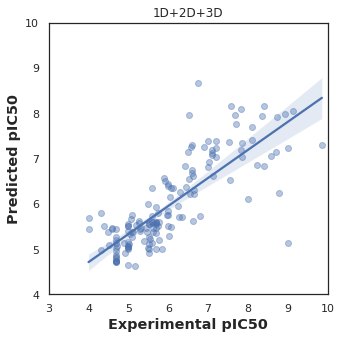

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, prediction3, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set(title='1D+2D+3D')
ax.set_xlim(3, 10)
ax.set_ylim(4, 10)
ax.figure.set_size_inches(5, 5)
plt.show

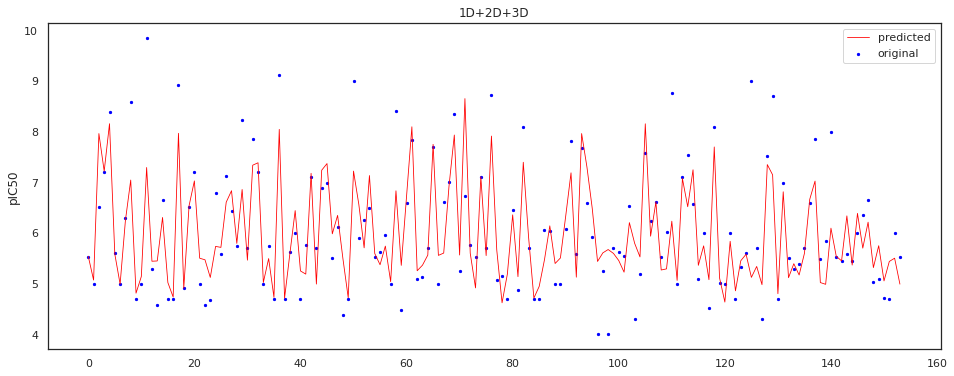

In [64]:
x_ax = range(len(Y_test))
plt.scatter(x_ax, Y_test, s=5, color="blue", label="original")
plt.plot(x_ax, prediction3, lw=0.8, color="red", label="predicted")
plt.title("1D+2D+3D")
plt.ylabel("pIC50")
plt.legend()
plt.show() 

##2D+3D+F

In [65]:
df4 = pd.merge(df, df3, how="left", on=["Name"])

In [66]:
X4= df4.drop('Name', axis=1)
X4

,FP1,FP2,FP3,FP4,FP5,FP6,FP7,FP8,FP9,FP10,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,1,0,0,1,0,0,0,0,0,0,...,0.840189,0.135543,0.633989,0.335856,0.234206,26.442340,96.181953,173.720274,0.760284,1.204051
1,0,0,0,0,1,0,1,0,1,0,...,0.863471,0.107429,0.531981,0.436635,0.433203,52.473404,333.208877,775.688308,0.795207,1.401819
2,0,0,0,0,1,0,1,0,0,1,...,0.697043,0.199940,0.664555,0.401713,0.446637,33.048866,253.146736,804.441768,0.545565,1.512906
3,0,0,0,0,1,0,0,1,0,0,...,0.885563,0.092530,0.582566,0.354198,0.419757,43.745290,197.810300,391.828006,0.828345,1.356521
4,1,1,1,0,1,0,1,1,1,0,...,0.812606,0.106545,0.575021,0.523626,0.401330,49.307849,391.169069,1279.615826,0.718910,1.499977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,0,1,1,0,0,0,0,0,0,0,...,0.854325,0.076205,0.568053,0.421117,0.408899,23.762793,73.264902,157.715173,0.781487,1.398069
766,0,0,0,0,1,0,0,0,0,0,...,0.661971,0.215487,0.518928,0.398162,0.375722,17.409774,75.827005,185.477639,0.492957,1.292812
767,1,0,0,0,1,1,0,0,1,0,...,0.773830,0.200030,0.680893,0.542107,0.381504,63.854530,734.933217,1852.223463,0.660746,1.604505
768,1,0,0,0,1,1,0,0,1,0,...,0.782789,0.190521,0.667738,0.530499,0.365604,67.766071,804.173380,2110.665999,0.674183,1.563841


In [67]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X4 = selection.fit_transform(X4)

In [68]:
X4.shape

(770, 2893)

In [69]:
Y

0      7.421361
1      4.397940
2      4.698970
3      4.698970
4      5.667562
         ...   
765    9.000000
766    7.829738
767    7.065502
768    7.657577
769    7.078834
Name: pIC50, Length: 770, dtype: float64

In [70]:
# Splitting dataset into training and testing sets
X4_train, X4_test, Y_train, Y_test = train_test_split(X4, Y, test_size = 0.2, random_state = 42)
   
# Creating and training model
model4 = RandomForestRegressor(n_estimators=100, random_state= 0)
model4.fit(X4_train, Y_train)
   
# Model making a prediction on test data
prediction4 = model4.predict(X4_test)
   
# Evaluation of r2 score of the model against the test set
print(f"r2 Score Of Test Set : {r2_score(Y_test, prediction4)}")

r2 Score Of Test Set : 0.6709106192472531


In [72]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, prediction4)
#rmse = sqrt(mse)
mse

0.5115390892800818

In [73]:
# example of calculate the mean absolute error
from sklearn.metrics import mean_absolute_error
# calculate errors
errors = mean_absolute_error(Y_test, prediction4)
print(errors)

0.4678242472131324


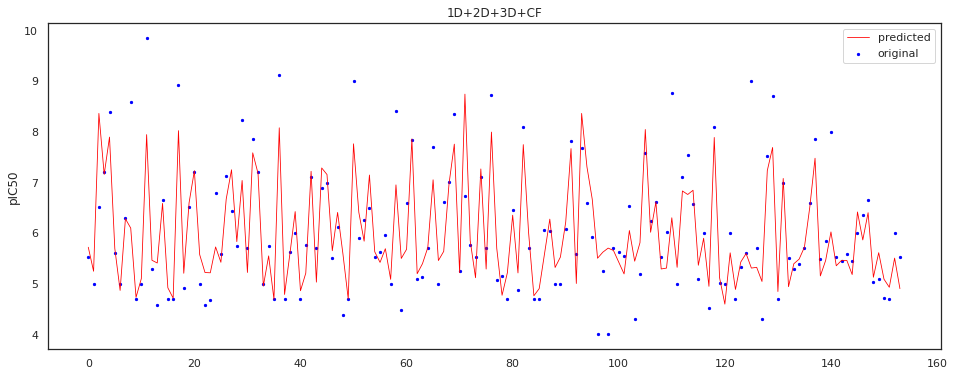

In [74]:
x_ax = range(len(Y_test))
plt.scatter(x_ax, Y_test, s=5, color="blue", label="original")
plt.plot(x_ax, prediction4, lw=0.8, color="red", label="predicted")
plt.title("1D+2D+3D+CF")
plt.ylabel("pIC50")
plt.legend()
plt.show() 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

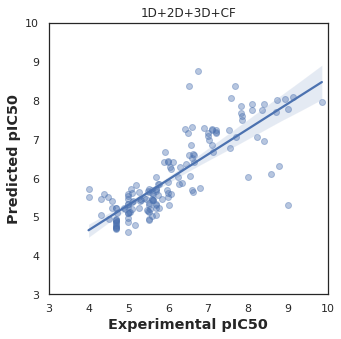

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, prediction4, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set(title='1D+2D+3D+CF')
ax.set_xlim(3, 10)
ax.set_ylim(3, 10)
ax.figure.set_size_inches(5, 5)
plt.show

##2D+3D+F+USR

In [ ]:
df5= pd.read_csv('USR_df.csv')

In [ ]:
df5 = pd.merge(df5, df4, on=["Name"])

In [ ]:
df_y2 = df_y[['Name', 'pIC50']]

In [ ]:
Y5= pd.merge(df5['Name'], df_y2, on=["Name"])

In [ ]:
df5 = pd.merge(df5, Y5, on=["Name"])

In [ ]:
df5

,Name,USR_1,USR_2,USR_3,USR_4,USR_5,USR_6,USR_7,USR_8,USR_9,...,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds,pIC50
0,CHEMBL100624,5.111275,2.327562,0.521235,5.182383,2.412567,0.261987,10.162094,4.857588,-0.587224,...,0.035630,0.578233,0.466584,0.461906,41.495050,101.302079,205.098132,0.907431,1.506723,4.480172
1,CHEMBL102194,7.633311,3.713499,0.441644,7.719860,3.774694,0.069655,15.348278,7.987874,-0.198167,...,0.051874,0.528309,0.450719,0.414840,92.272509,496.130483,958.762968,0.907663,1.393868,7.568636
2,CHEMBL104,3.316825,1.164268,-0.652970,3.320040,1.202429,-0.684216,5.936920,2.267223,-0.921915,...,0.363760,0.381778,0.347660,0.354429,12.294133,49.742955,128.054407,0.111979,1.083867,4.947729
3,CHEMBL104061,6.317170,2.388525,0.542856,6.389362,2.895002,0.329128,11.733123,5.730873,-0.738715,...,0.143069,0.526620,0.428187,0.454695,47.080681,323.850715,721.837563,0.742848,1.409502,5.698970
4,CHEMBL104076,6.719421,2.934223,0.454294,6.840300,3.259092,0.102403,12.968726,6.691988,-0.536921,...,0.070443,0.511753,0.418066,0.431086,63.396541,351.071219,806.993652,0.858104,1.360906,5.154902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,CHEMBL9841,2.808262,1.018666,-0.523950,2.794226,1.137191,0.246597,5.211146,2.421948,-0.745038,...,0.234007,0.539117,0.513825,0.364002,8.290396,15.247158,29.216612,0.558451,1.416945,4.920819
765,CHEMBL98773,4.720246,2.070812,0.541490,4.801094,2.184815,0.000605,9.403594,4.431506,-0.695848,...,0.053305,0.563321,0.348926,0.327525,32.689484,81.954914,163.485736,0.877189,1.239773,6.096910
766,CHEMBL98975,4.881656,2.179786,0.357767,4.939153,2.259584,0.357407,9.725440,4.714075,-0.643144,...,0.043330,0.546161,0.451717,0.378027,37.253539,79.454247,152.099873,0.909791,1.375905,7.397940
767,CHEMBL99331,5.254545,2.658496,0.540513,5.272849,2.706642,0.513514,10.339657,5.324793,-0.246769,...,0.063015,0.551476,0.472611,0.317871,37.700077,110.363174,210.885417,0.875033,1.341959,4.716699


In [ ]:
Y5

,Name,pIC50
0,CHEMBL100624,4.480172
1,CHEMBL102194,7.568636
2,CHEMBL104,4.947729
3,CHEMBL104061,5.698970
4,CHEMBL104076,5.154902
...,...,...
764,CHEMBL9841,4.920819
765,CHEMBL98773,6.096910
766,CHEMBL98975,7.397940
767,CHEMBL99331,4.716699


In [ ]:
X5 = pd.merge(df5, Y5['Name'], on=["Name"])
X5 = X5.drop('Name', axis= 1)
X5 = X5.drop('pIC50', axis=1)
X5

,USR_1,USR_2,USR_3,USR_4,USR_5,USR_6,USR_7,USR_8,USR_9,USR_10,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,5.111275,2.327562,0.521235,5.182383,2.412567,0.261987,10.162094,4.857588,-0.587224,9.371578,...,0.938287,0.035630,0.578233,0.466584,0.461906,41.495050,101.302079,205.098132,0.907431,1.506723
1,7.633311,3.713499,0.441644,7.719860,3.774694,0.069655,15.348278,7.987874,-0.198167,13.926388,...,0.938442,0.051874,0.528309,0.450719,0.414840,92.272509,496.130483,958.762968,0.907663,1.393868
2,3.316825,1.164268,-0.652970,3.320040,1.202429,-0.684216,5.936920,2.267223,-0.921915,5.432708,...,0.377559,0.363760,0.381778,0.347660,0.354429,12.294133,49.742955,128.054407,0.111979,1.083867
3,6.317170,2.388525,0.542856,6.389362,2.895002,0.329128,11.733123,5.730873,-0.738715,10.546449,...,0.828565,0.143069,0.526620,0.428187,0.454695,47.080681,323.850715,721.837563,0.742848,1.409502
4,6.719421,2.934223,0.454294,6.840300,3.259092,0.102403,12.968726,6.691988,-0.536921,12.174121,...,0.905403,0.070443,0.511753,0.418066,0.431086,63.396541,351.071219,806.993652,0.858104,1.360906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,2.808262,1.018666,-0.523950,2.794226,1.137191,0.246597,5.211146,2.421948,-0.745038,4.421580,...,0.705634,0.234007,0.539117,0.513825,0.364002,8.290396,15.247158,29.216612,0.558451,1.416945
765,4.720246,2.070812,0.541490,4.801094,2.184815,0.000605,9.403594,4.431506,-0.695848,8.123533,...,0.918126,0.053305,0.563321,0.348926,0.327525,32.689484,81.954914,163.485736,0.877189,1.239773
766,4.881656,2.179786,0.357767,4.939153,2.259584,0.357407,9.725440,4.714075,-0.643144,8.593060,...,0.939861,0.043330,0.546161,0.451717,0.378027,37.253539,79.454247,152.099873,0.909791,1.375905
767,5.254545,2.658496,0.540513,5.272849,2.706642,0.513514,10.339657,5.324793,-0.246769,9.903454,...,0.916688,0.063015,0.551476,0.472611,0.317871,37.700077,110.363174,210.885417,0.875033,1.341959


In [ ]:
Y5 = Y5.pIC50
Y5

0      4.480172
1      7.568636
2      4.947729
3      5.698970
4      5.154902
         ...   
764    4.920819
765    6.096910
766    7.397940
767    4.716699
768    5.619789
Name: pIC50, Length: 769, dtype: float64

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X5 = selection.fit_transform(X5)

In [ ]:
X5.shape

(769, 2895)

In [ ]:
# Splitting dataset into training and testing sets
X5_train, X5_test, Y5_train, Y5_test = train_test_split(X5, Y5, test_size = 0.2, random_state = 42)
   
# Creating and training model
model5 = RandomForestRegressor(n_estimators=100, random_state= 0)
fit = model5.fit(X5_train, Y5_train)
   
# Model making a prediction on test data
prediction5 = model5.predict(X5_test)
   
# Evaluation of r2 score of the model against the test set
print(f"r2 Score Of Test Set : {r2_score(Y5_test, prediction5)}")

r2 Score Of Test Set : 0.6718755796980118


In [ ]:
df5.to_csv('Descriptors.csv', index=False)

In [ ]:
from sklearn import model_selection
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import BaggingRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import Ridge
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn import svm

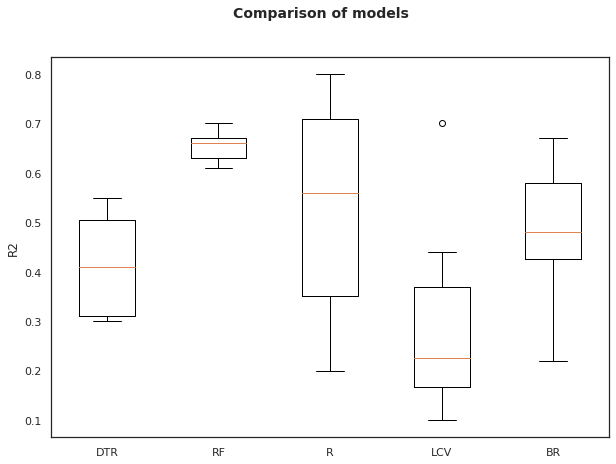

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 
 
# Creating dataset
np.random.seed(10)
 
data_DTR = 0.55, 0.32, 0.41, 0.3, 0.3, 0.46, 0.55
data_RFM = 0.66, 0.64, 0.61, 0.66, 0.62, 0.68, 0.7
data_R = 0.8, 0.3,0.2,0.4, 0.7, 0.56, 0.72
data_LCV = 0.7, 0.3, 0.225, 0.111, 0.1, 0.223, 0.44
data_BR = 0.67, 0.22, 0.45, 0.4, 0.5, 0.48, 0.66

data = [data_DTR, data_RFM, data_R, data_LCV, data_BR]

 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
#ax = fig.add_axes([0, 0,1 , 1])
 
# Creating plot
bp = ax.boxplot(data)


fig.suptitle('Comparison of models', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
ax.boxplot(data)

ax.set_ylabel('R2')
plt.xticks([1, 2, 3,4, 5], ['DTR', 'RF', 'R','LCV', 'BR'])
plt.show()

Mse for above 7 0.35, Mae is 0.47 and R2 id 0.20

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y5_test, prediction5)
#rmse = sqrt(mse)
mse

0.5225400405735526

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

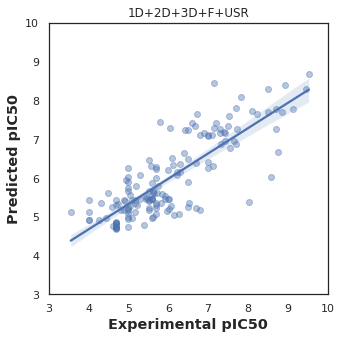

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y5_test, prediction5, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set(title='1D+2D+3D+F+USR')
ax.set_xlim(3, 10)
ax.set_ylim(3, 10)
ax.figure.set_size_inches(5, 5)
plt.show

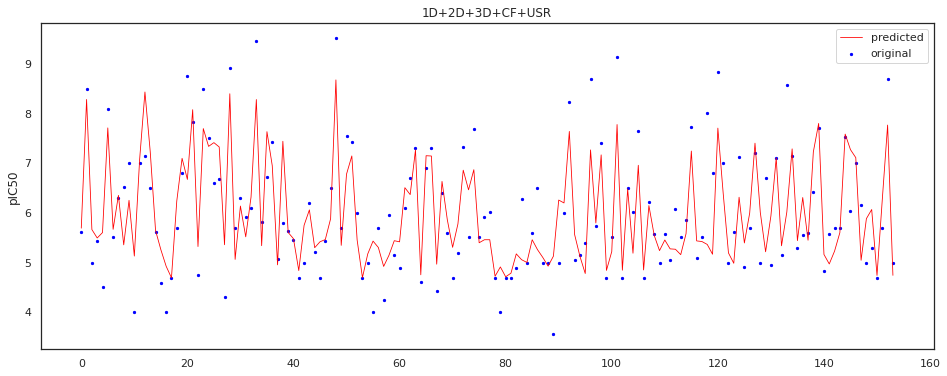

In [ ]:
x_ax = range(len(Y5_test))
plt.scatter(x_ax, Y5_test, s=5, color="blue", label="original")
plt.plot(x_ax, prediction5, lw=0.8, color="red", label="predicted")
plt.title("1D+2D+3D+CF+USR")
plt.ylabel("pIC50")
plt.legend()
plt.show() 

The positive improvement of the higher ones has affected the predictions of the lower one. Calculate the mse and mae for above 7 and below 7 for test set. Compare 2D+USR instead of 3D+2D. Some smiles that the descriptors and the 3D can not calculate. 

## 2D+ USR

In [ ]:
df5= pd.read_csv('USR_df.csv')

In [ ]:
df6 = pd.merge(df5, df1, on=["Name"])

In [ ]:
Y6= pd.merge(df5['Name'], df1, on=["Name"])

In [ ]:
Y6= pd.merge(df5['Name'], df_y2, on=["Name"])
Y6 = Y6.pIC50
Y6

0      4.480172
1      7.568636
2      4.947729
3      5.698970
4      5.154902
         ...   
764    4.920819
765    6.096910
766    7.397940
767    4.716699
768    5.619789
Name: pIC50, Length: 769, dtype: float64

In [ ]:
X6= df6.drop('Name', axis=1)
X6

,USR_1,USR_2,USR_3,USR_4,USR_5,USR_6,USR_7,USR_8,USR_9,USR_10,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,5.111275,2.327562,0.521235,5.182383,2.412567,0.261987,10.162094,4.857588,-0.587224,9.371578,...,7.851921,58.575573,2.019847,25.944313,10.326383,12.384929,3049.0,36.0,2.189,146.0
1,7.633311,3.713499,0.441644,7.719860,3.774694,0.069655,15.348278,7.987874,-0.198167,13.926388,...,6.785216,82.333916,2.008144,31.656990,15.650588,12.488769,8320.0,57.0,4.880,198.0
2,3.316825,1.164268,-0.652970,3.320040,1.202429,-0.684216,5.936920,2.267223,-0.921915,5.432708,...,8.193048,51.795270,2.071811,9.034916,0.000000,6.473685,1225.0,44.0,8.559,134.0
3,6.317170,2.388525,0.542856,6.389362,2.895002,0.329128,11.733123,5.730873,-0.738715,10.546449,...,7.533480,70.477114,2.013632,28.568629,10.059078,15.018058,5074.0,49.0,3.137,172.0
4,6.719421,2.934223,0.454294,6.840300,3.259092,0.102403,12.968726,6.691988,-0.536921,12.174121,...,7.780685,81.356258,2.033906,28.690945,13.082552,12.116616,7582.0,56.0,6.575,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,2.808262,1.018666,-0.523950,2.794226,1.137191,0.246597,5.211146,2.421948,-0.745038,4.421580,...,7.541413,26.450254,2.034635,8.993407,0.000000,6.446338,240.0,17.0,1.895,64.0
765,4.720246,2.070812,0.541490,4.801094,2.184815,0.000605,9.403594,4.431506,-0.695848,8.123533,...,7.024563,50.935748,2.037430,15.001111,5.574036,9.427074,1933.0,32.0,3.558,124.0
766,4.881656,2.179786,0.357767,4.939153,2.259584,0.357407,9.725440,4.714075,-0.643144,8.593060,...,7.207631,53.080055,2.041541,18.043942,8.644980,9.398962,2302.0,31.0,3.313,126.0
767,5.254545,2.658496,0.540513,5.272849,2.706642,0.513514,10.339657,5.324793,-0.246769,9.903454,...,7.227377,58.551059,2.019002,23.477416,10.330959,9.911926,2874.0,39.0,2.996,148.0


In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X6 = selection.fit_transform(X6) #Remove low variance features

In [ ]:
# Splitting dataset into training and testing sets
X6_train, X6_test, Y6_train, Y6_test = train_test_split(X6, Y6, test_size = 0.2, random_state = 42)
   
# Creating and training model
model6 = RandomForestRegressor(n_estimators=100, random_state= 0)
model6.fit(X6_train, Y6_train)
   
# Model making a prediction on test data
prediction6 = model6.predict(X6_test)
   
# Evaluation of r2 score of the model against the test set
print(f"r2 Score Of Test Set : {r2_score(Y6_test, prediction6)}")

r2 Score Of Test Set : 0.615906594440049


In [ ]:
X6.shape

(769, 573)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y6_test, prediction6)
#rmse = sqrt(mse)
mse

0.6116709738964671

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

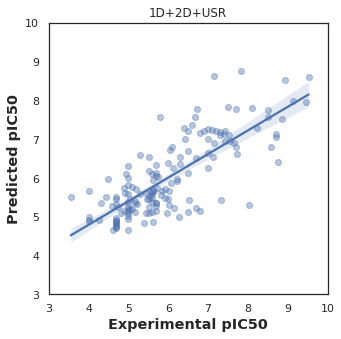

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y6_test, prediction6, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set(title='1D+2D+USR')
ax.set_xlim(3, 10)
ax.set_ylim(3, 10)
ax.figure.set_size_inches(5, 5)
plt.show

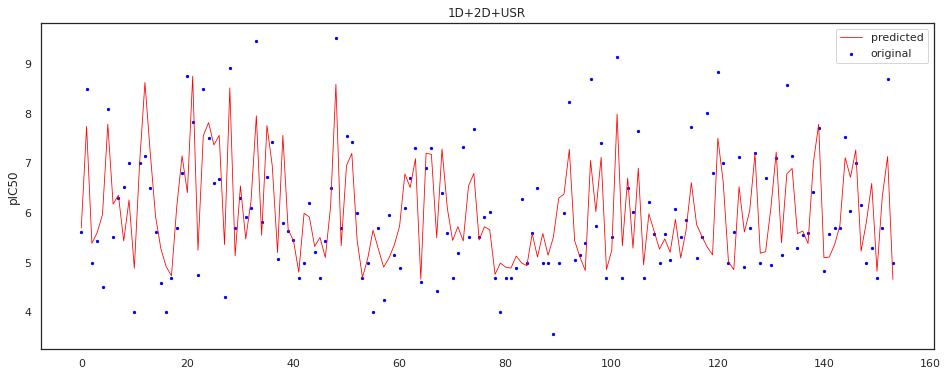

In [ ]:
x_ax = range(len(Y6_test))
plt.scatter(x_ax, Y6_test, s=5, color="blue", label="original")
plt.plot(x_ax, prediction6, lw=0.8, color="red", label="predicted")
plt.title("1D+2D+USR")
plt.ylabel("pIC50")
plt.legend()
plt.show() 